<a href="https://colab.research.google.com/github/sujataprasad01/ML-Logistic-Regression-Titanic-Survival-Dataset-/blob/main/Logistic_Regression_(Titanic_Survival_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

# Importing the data

In [206]:
df=pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

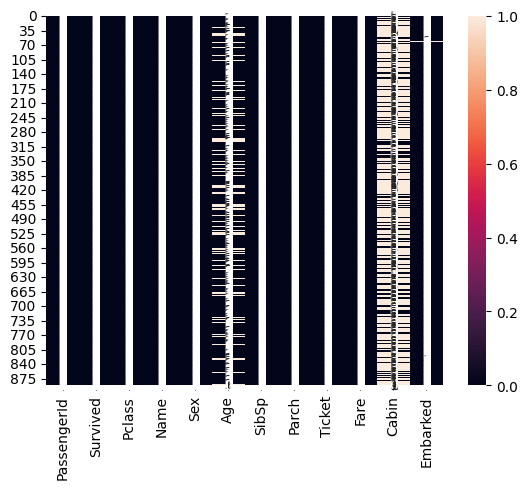

In [ ]:
sns.heatmap(df.isnull(), annot=True)

In [ ]:
(df.Age.isnull().sum()/len(df.Age))*100

19.865319865319865

In [ ]:
(df.Cabin.isnull().sum()/len(df.Cabin))*100

77.10437710437711

In [ ]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [207]:
df.drop('Cabin', axis=1, inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [ ]:
df.Pclass.unique()

array([3, 1, 2])

In [ ]:
df.loc[df.Pclass==1, 'Embarked']

1      C
3      S
6      S
11     S
23     S
      ..
871    S
872    S
879    C
887    S
889    C
Name: Embarked, Length: 216, dtype: object

In [ ]:
df.loc[df.Pclass==1, 'Embarked'].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [ ]:
df.loc[df.Pclass==2, 'Embarked'].value_counts()

S    164
C     17
Q      3
Name: Embarked, dtype: int64

In [ ]:
df.loc[df.Pclass==3, 'Embarked'].value_counts()

S    353
Q     72
C     66
Name: Embarked, dtype: int64

In [ ]:
df.loc[df.Fare==80. , 'Embarked']

61     NaN
829    NaN
Name: Embarked, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
df.loc[df.Ticket=='113572', 'Embarked']

61     NaN
829    NaN
Name: Embarked, dtype: object

In [ ]:
df.dropna()  # can't do now 1st have to deal with age null values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
df.loc[[61,829]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
df.Age.isnull().sum()

177

In [ ]:
df[df.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


In [ ]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
df.Age.mean()

29.69911764705882

In [ ]:
df.Age.median()

28.0

In [ ]:
df.Age.mode()

0    24.0
Name: Age, dtype: float64

<Axes: >

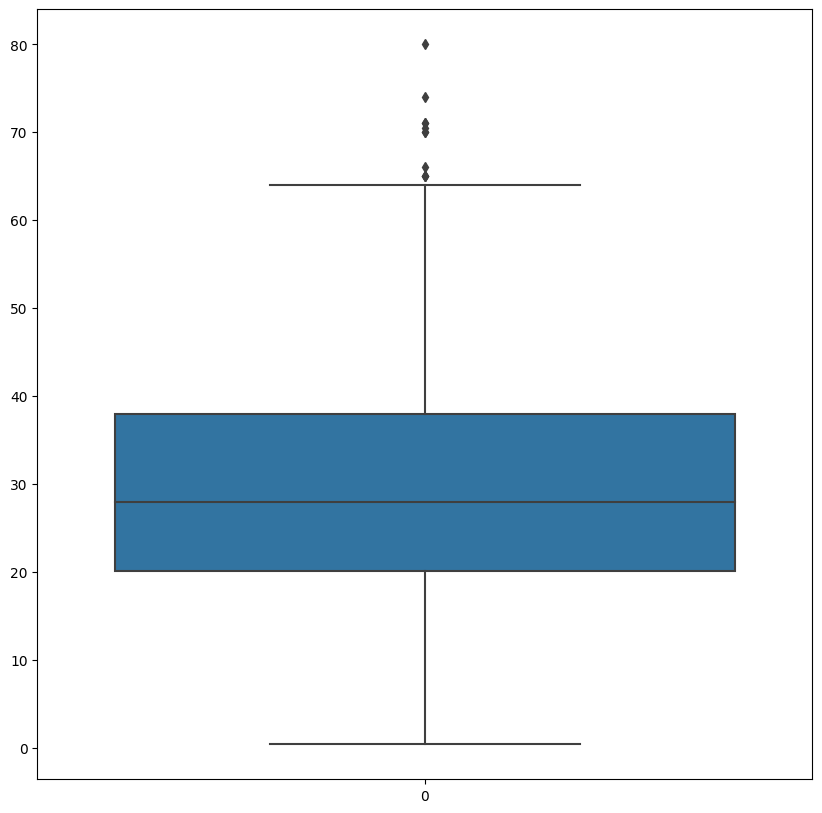

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(df.Age)

<Axes: >

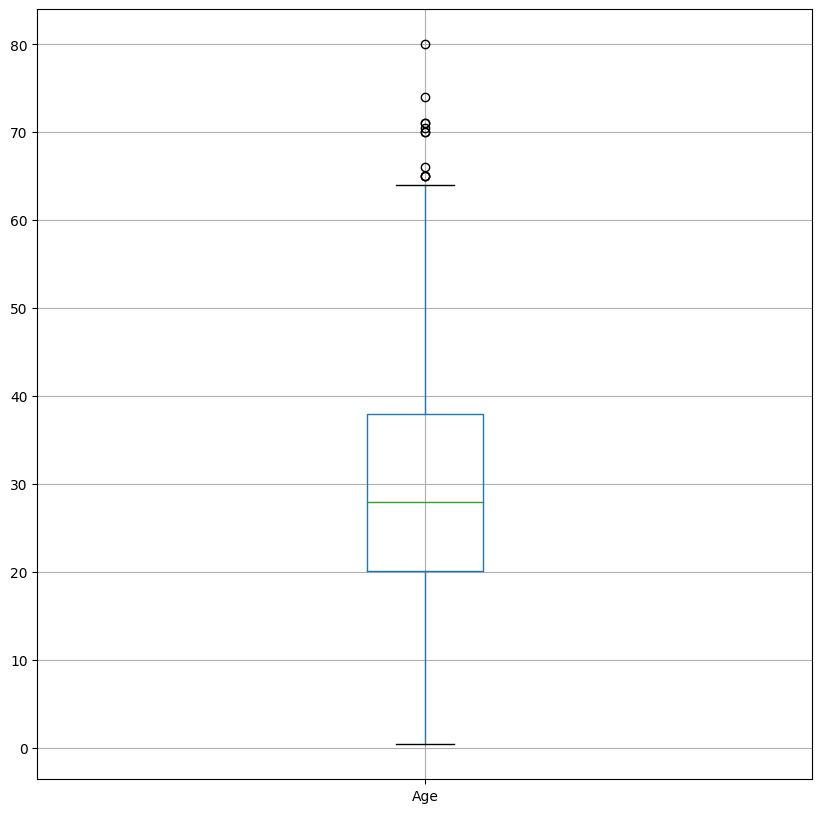

In [ ]:
plt.figure(figsize=(10,10))
df.boxplot('Age')

In [ ]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [ ]:
df.Age.duplicated()

0      False
1      False
2      False
3      False
4       True
       ...  
886     True
887     True
888     True
889     True
890     True
Name: Age, Length: 891, dtype: bool

In [ ]:
df.Age.duplicated().sum()

802

In [ ]:
df[df.Age.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
df[df.Age==35.0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,S
211,212,1,2,"Cameron, Miss. Clear Annie",female,35.0,0,0,F.C.C. 13528,21.0000,S
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,S
363,364,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,S
383,384,1,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.0,1,0,113789,52.0000,S


In [ ]:
# Fill all the null values in the age with its median value

In [ ]:
median_value = df['Age'].median()

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
df['Age'].fillna(value=df['Age'].median(), inplace=True)

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [208]:
df.Age.fillna(value=df.Age.median(), inplace=True)

In [209]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [219]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df.shape

(889, 11)

In [ ]:
# Drop off the columns - pid, name, Ticket

In [212]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
# NOw dealing with categorical data

In [ ]:
df.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

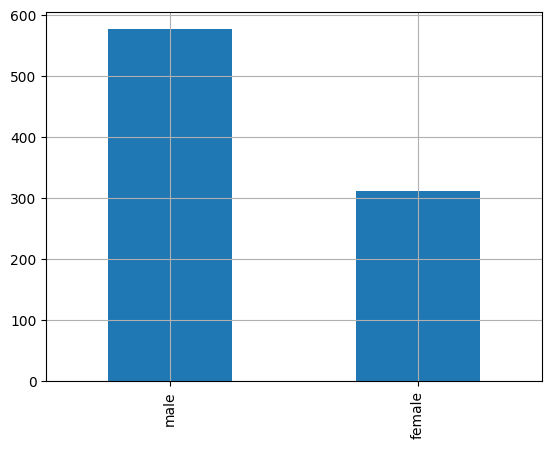

In [ ]:
df.Sex.value_counts().plot.bar(df.Sex)
plt.grid()

([<matplotlib.patches.Wedge at 0x7a939149a830>,
 [Text(1.099983695415496, 0.005989141847517913, ''),
  Text(2.099875493186535, 0.022867293556662352, ''),
  Text(2.099875493186535, 0.022867293556662352, ''),
  Text(2.099875493186535, 0.022867293556662352, ''),
  Text(1.0998532616395154, 0.017966715362585338, ''),
  Text(1.0995924095541194, 0.029942158421959207, ''),
  Text(1.0992011700906057, 0.041914051002539386, ''),
  Text(1.0986795896413348, 0.053880973502234086, ''),
  Text(2.0968880677900366, 0.1142822434141354, ''),
  Text(2.0968880677900366, 0.1142822434141354, ''),
  Text(2.0968880677900366, 0.1142822434141354, ''),
  Text(2.0968880677900366, 0.1142822434141354, ''),
  Text(1.0980277300542303, 0.0658415069082934, ''),
  Text(1.0972456686254444, 0.07779423296557283, ''),
  Text(2.0939020593222626, 0.15991924826608278, ''),
  Text(2.0939020593222626, 0.15991924826608278, ''),
  Text(1.0963334980901929, 0.08973773434470703, ''),
  Text(1.0952913266117585, 0.10167059481017376, ''),

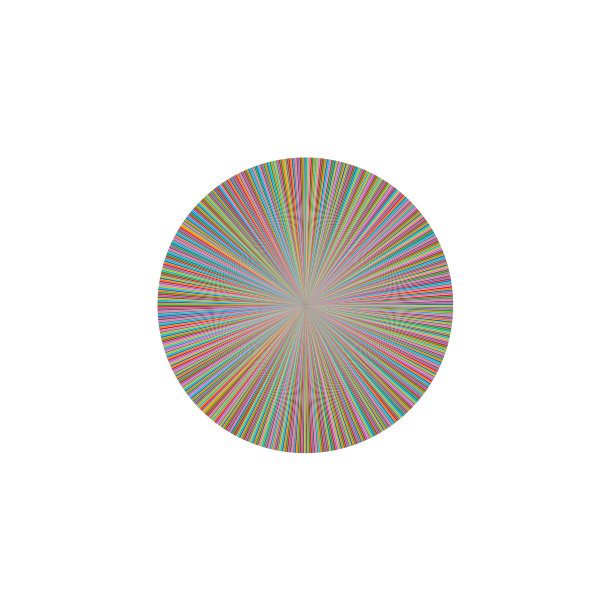

In [ ]:
plt.pie(df.Sex=='male', df.Sex=='female')

([<matplotlib.patches.Wedge at 0x7a938f20b640>,
 [Text(-0.49644324689069674, 0.9816028232521659, ''),
  Text(0.4964432468906962, -0.9816028232521663, '')])

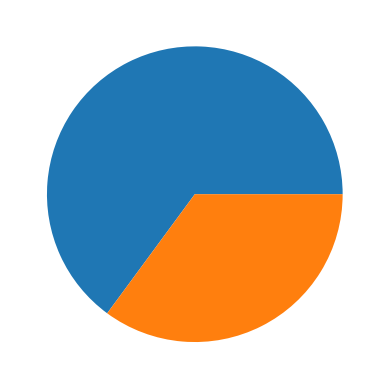

In [ ]:
plt.pie(df.Sex.value_counts())

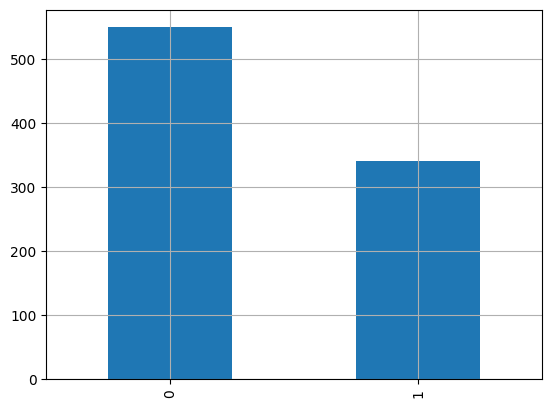

In [ ]:
df.Survived.value_counts().plot.bar(df.Survived)
plt.grid()

Text(0, 0.5, 'Sex')

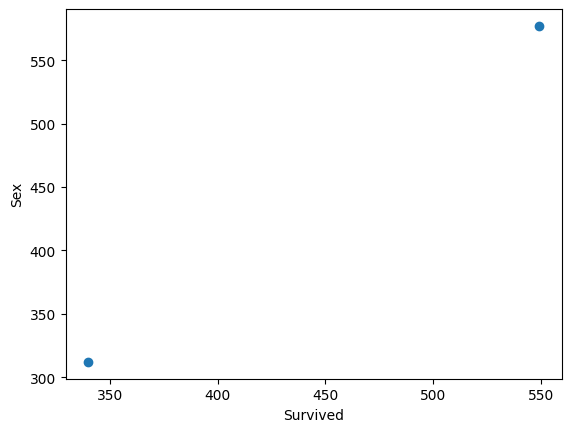

In [ ]:
plt.scatter(df.Survived.value_counts(), df.Sex.value_counts())
plt.xlabel('Survived')
plt.ylabel('Sex')

<Axes: xlabel='Survived,Sex'>

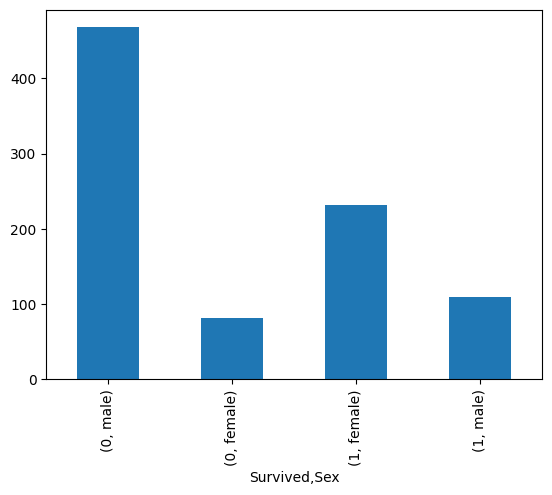

In [ ]:
df.Sex.groupby(df.Survived).value_counts().plot.bar(df.Sex)

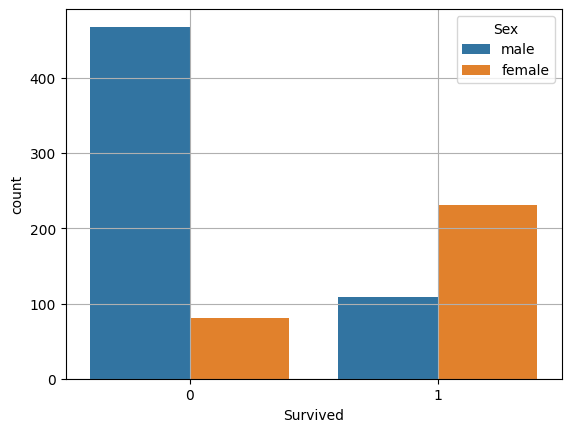

In [ ]:
sns.countplot(x='Survived', data=df, hue='Sex')
plt.grid()

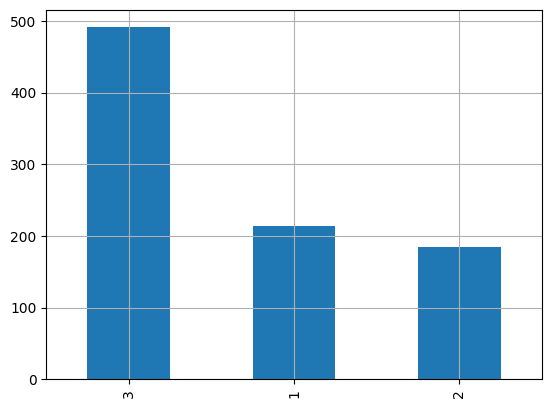

In [ ]:
df.Pclass.value_counts().plot.bar(df.Pclass)
plt.grid()

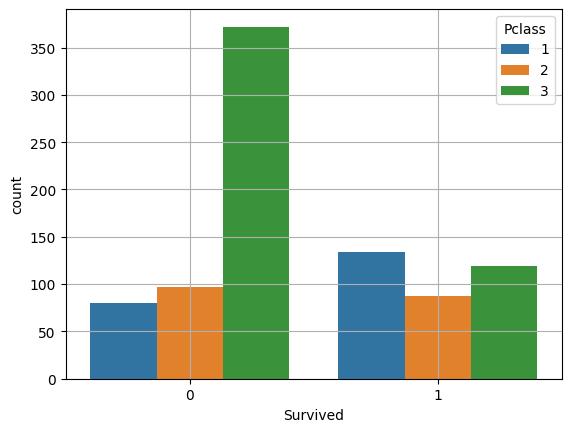

In [ ]:
sns.countplot(x='Survived', data=df, hue='Pclass')
plt.grid()

# Encoders

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [213]:
from sklearn.preprocessing import LabelEncoder

In [215]:
enc=LabelEncoder()

In [216]:
df.Sex=enc.fit_transform(df.Sex)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [217]:
df.Embarked=enc.fit_transform(df.Embarked)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
df.Age.isnull().sum()

889

In [210]:
df.Age = df.Age.astype(int)

In [218]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


In [222]:
df.shape

(891, 8)

In [223]:
newdf=df.copy()

<Axes: >

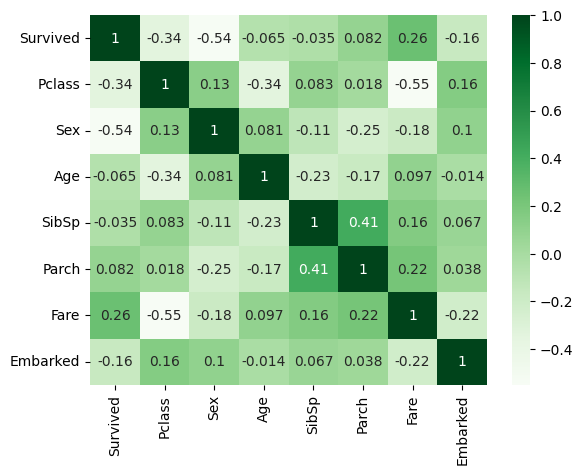

In [224]:
sns.heatmap(newdf.corr(), annot=True, cmap='Greens')

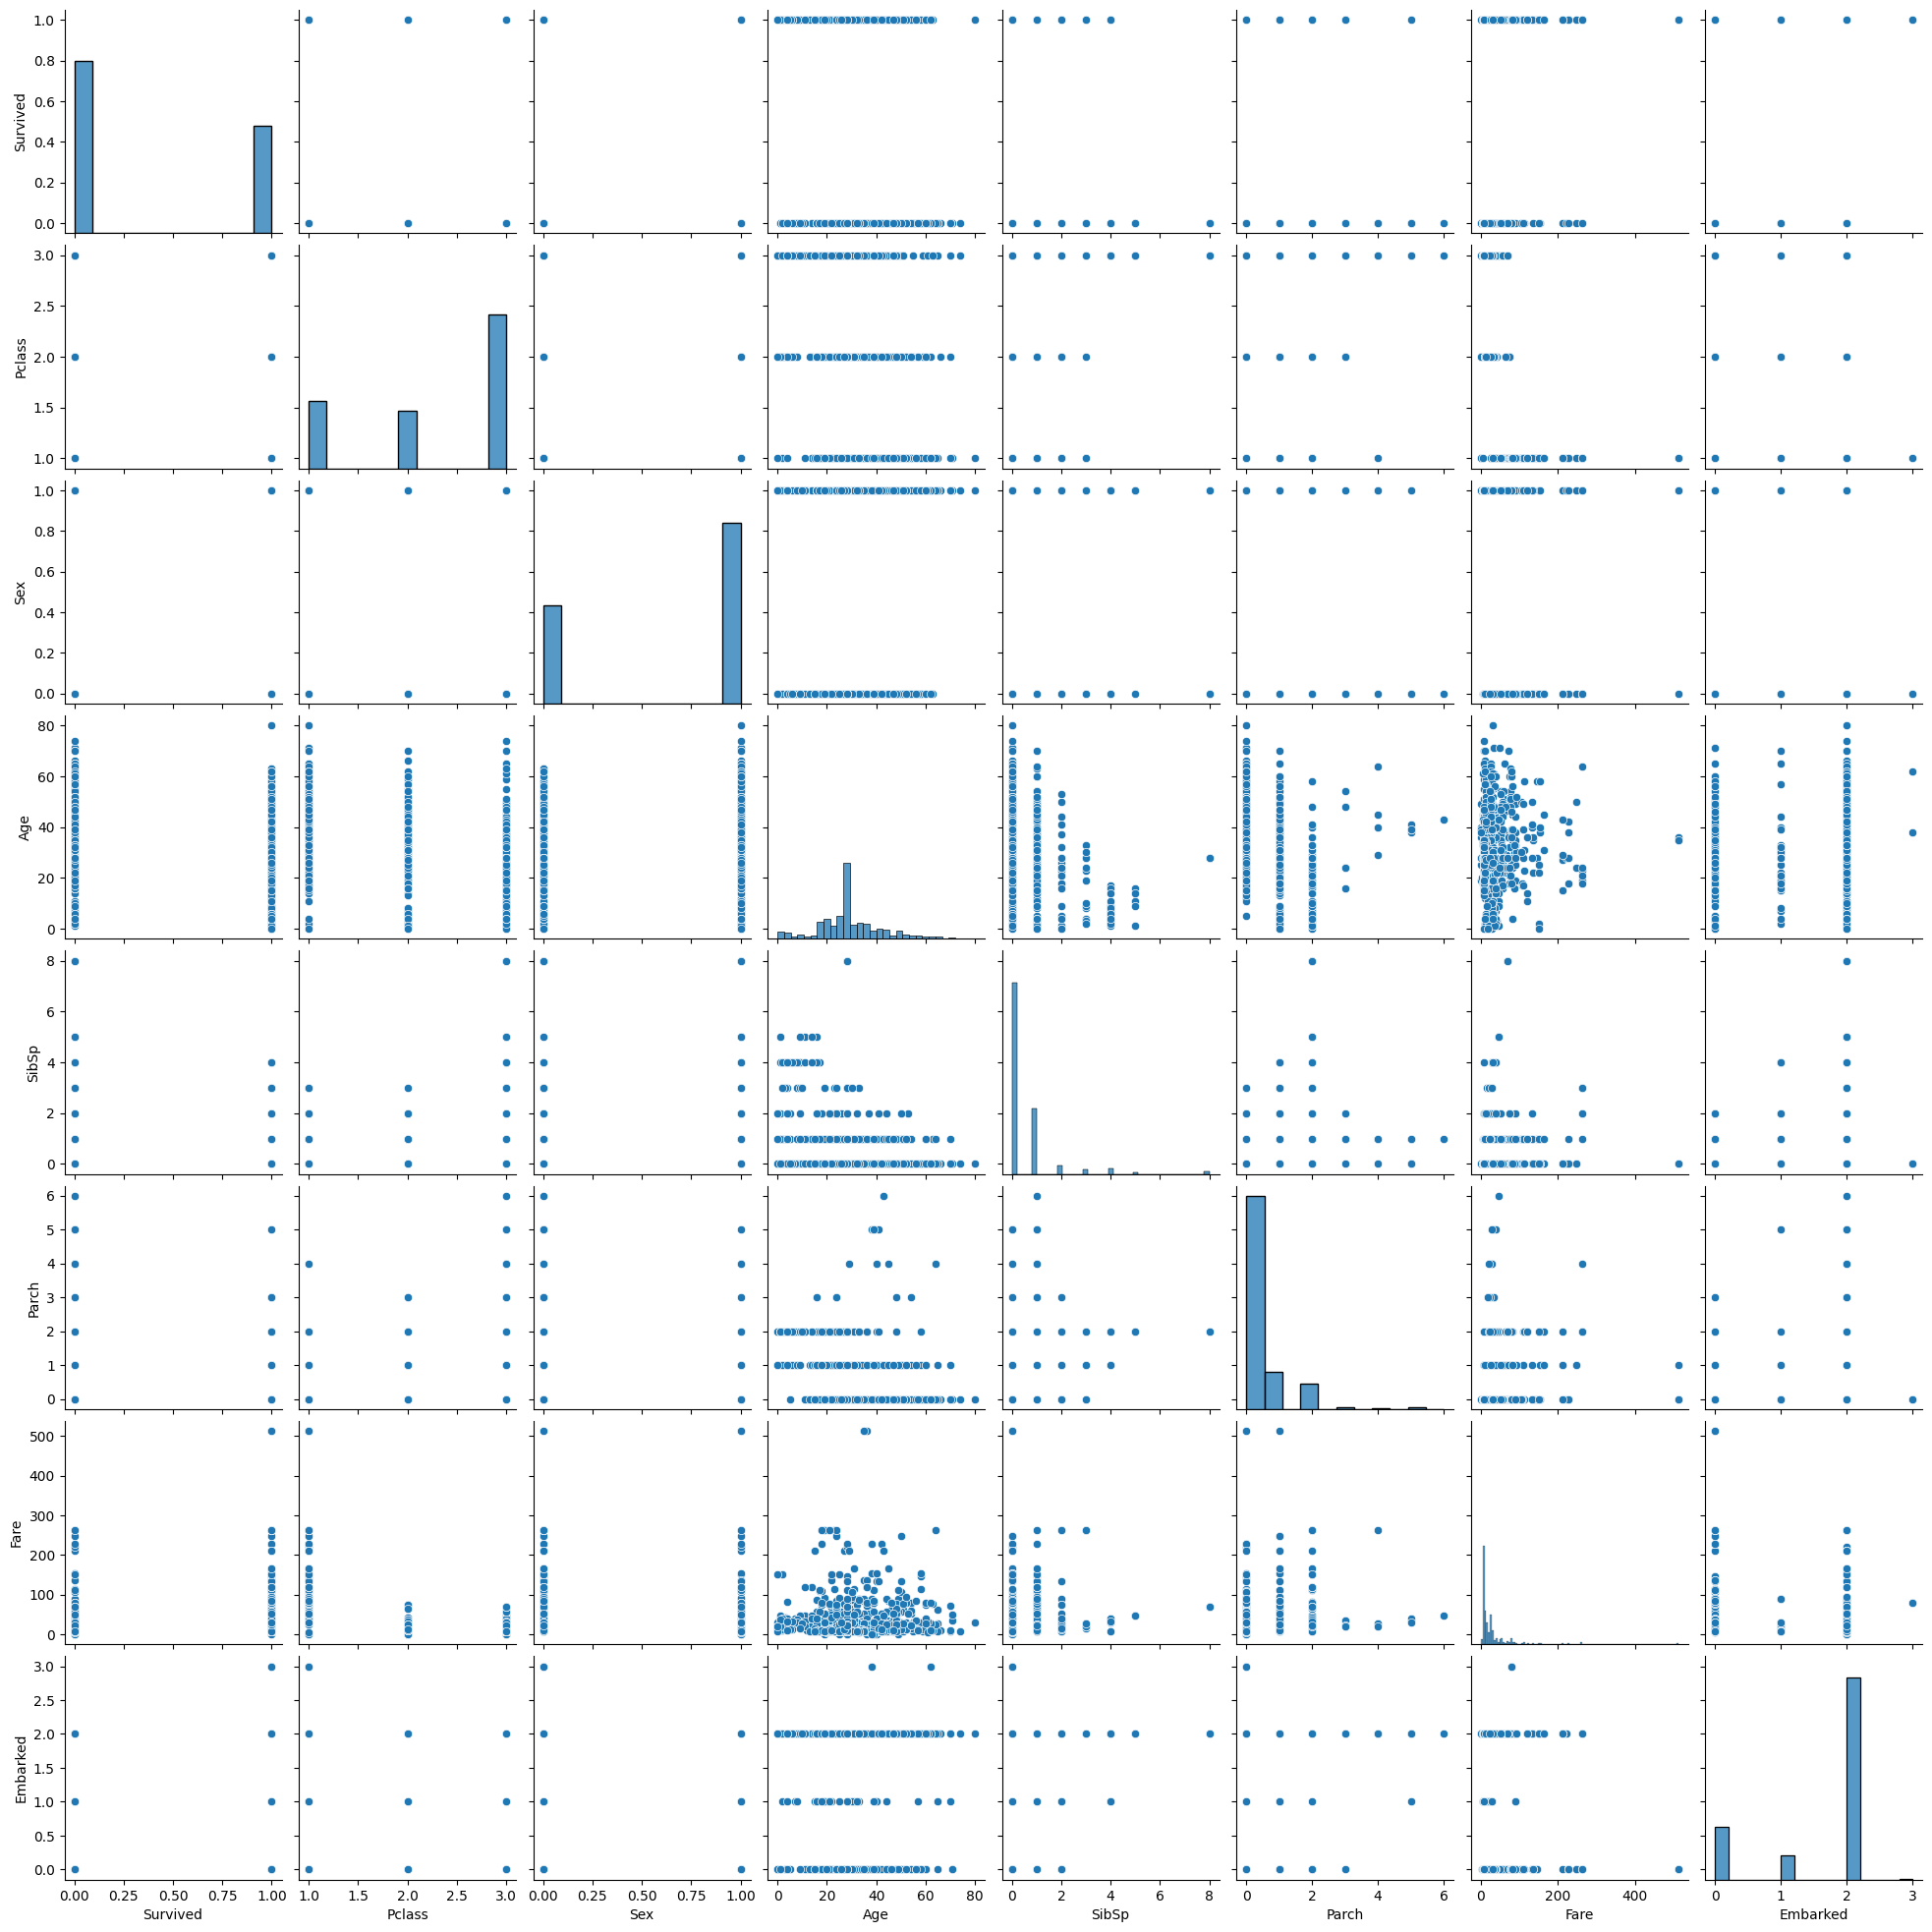

In [225]:
sns.pairplot(newdf)

# feature importance

In [226]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [227]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,7.2500,2
1,1,0,38,1,0,71.2833,0
2,3,0,26,0,0,7.9250,2
3,1,0,35,1,0,53.1000,2
4,3,1,35,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.0000,2
887,1,0,19,0,0,30.0000,2
888,3,0,28,1,2,23.4500,2
889,1,1,26,0,0,30.0000,0


In [228]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [229]:
from sklearn.ensemble import ExtraTreesClassifier

In [230]:
feat=ExtraTreesClassifier()

In [231]:
feat.fit(X,Y)

ExtraTreesClassifier()

In [233]:
feat.feature_importances_

array([0.10428933, 0.28916943, 0.24249576, 0.04403883, 0.04587076,
       0.2407949 , 0.03334099])

<Axes: >

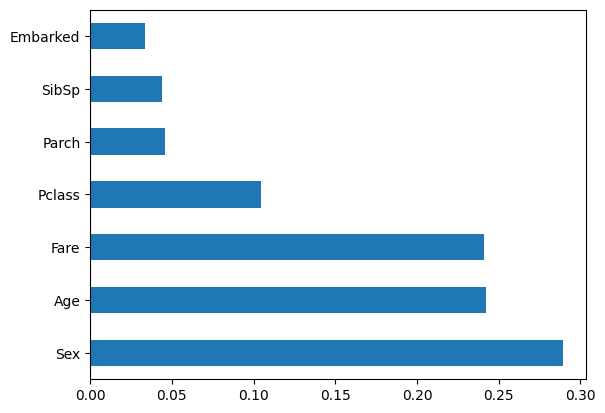

In [235]:
feat_imp=pd.Series(feat.feature_importances_, index=X.columns)
feat_imp.nlargest(8).plot(kind='barh')

# Machine Learning

# Splitting of Data

In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [241]:
skf=StratifiedKFold(n_splits=5)

In [242]:
for train_index, test_index in skf.split(X,Y):
  X_train, X_test= X.iloc[train_index], X.iloc[test_index]
  Y_train, Y_test= Y.iloc[train_index], Y.iloc[test_index]

In [243]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,7.2500,2
1,1,0,38,1,0,71.2833,0
2,3,0,26,0,0,7.9250,2
3,1,0,35,1,0,53.1000,2
4,3,1,35,0,0,8.0500,2
...,...,...,...,...,...,...,...
714,2,1,52,0,0,13.0000,2
715,3,1,19,0,0,7.6500,2
718,3,1,28,0,0,15.5000,1
719,3,1,33,0,0,7.7750,2


In [244]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
706,2,0,45,0,0,13.5000,2
707,1,1,42,0,0,26.2875,2
708,1,0,22,0,0,151.5500,2
709,3,1,28,1,1,15.2458,0
710,1,0,24,0,0,49.5042,0
...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.0000,2
887,1,0,19,0,0,30.0000,2
888,3,0,28,1,2,23.4500,2
889,1,1,26,0,0,30.0000,0


In [245]:
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
714    0
715    0
718    0
719    0
721    0
Name: Survived, Length: 713, dtype: int64

In [246]:
Y_test

706    1
707    1
708    1
709    1
710    1
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 178, dtype: int64

# model selection

In [248]:
classifier=LogisticRegression()

# Training the model

In [249]:
classifier.fit(X_train, Y_train)

LogisticRegression()

# Test the model

In [250]:
y_pred=classifier.predict(X_test)

# EDA

In [251]:
final=pd.DataFrame({"Actual VAlue": Y_test, "Predicted Value": y_pred})

In [252]:
final.head()

,Actual VAlue,Predicted Value
706,1,1
707,1,0
708,1,1
709,1,0
710,1,1


<Axes: >

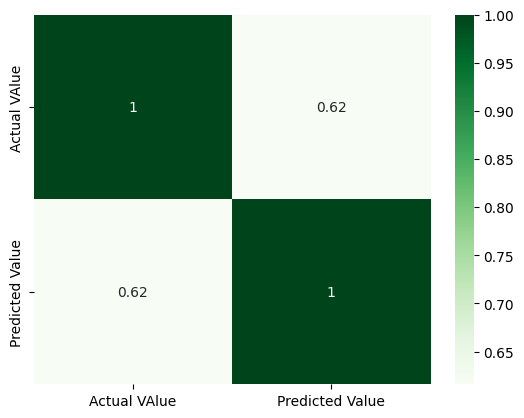

In [253]:
sns.heatmap(final.corr(), annot=True, cmap='Greens')

# Perfromance